In [16]:
from fasta2df import fasta_to_df, all_data_df_to_arange_df
from collections import defaultdict
import itertools
from sklearn.decomposition import PCA
import numpy as np
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
from keras import models
from keras import layers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

N = 5
BASE = ["A", "T", "G", "C"]
N_BASE = ["".join(i) for i in list(itertools.product(BASE, repeat=N))]

JAPAN_HEADER_COLUMNS = ["head", "ID", "date"]
ALL_DATA_HEADER_COLUMNS = ["head", "id", "continent", "country", "city", "host", "clade_head", "date"]

In [3]:
header, feature = fasta_to_df("all_data_odd_penta", N, ALL_DATA_HEADER_COLUMNS, N_BASE)

In [4]:
data = all_data_df_to_arange_df(header, feature)

In [5]:
data

,AAAAA,AAAAT,AAAAG,AAAAC,AAATA,AAATT,AAATG,AAATC,AAAGA,AAAGT,...,country,city,host,clade_head,date,year,month,day,clade,head2
0,0.789334,0.917352,1.415344,1.350947,0.589727,1.157516,1.355789,0.787686,1.565456,1.136470,...,China,Hubei,Human,L_>Wuhan/IVDC-HB-01/2019,2019-12-30,2019,12,30,L,Wuhan/IVDC-HB-01/2019
1,0.789334,0.917161,1.415344,1.351440,0.589604,1.157033,1.355506,0.787809,1.565456,1.136233,...,China,Hubei,Human,L_>Wuhan/IVDC-HB-04/2020,2020-01-01,2020,01,01,L,Wuhan/IVDC-HB-04/2020
2,0.788450,0.916530,1.414558,1.349736,0.589198,1.156737,1.355340,0.787157,1.564586,1.136093,...,China,Hubei,Human,L_>Wuhan/IVDC-HB-05/2019,2019-12-30,2019,12,30,L,Wuhan/IVDC-HB-05/2019
3,0.789777,0.917860,1.415496,1.351553,0.590053,1.158147,1.335984,0.788033,1.565624,1.136583,...,China,Hubei,Human,L_>Wuhan/IPBCAMS-WH-01/2019,2019-12-24,2019,12,24,L,Wuhan/IPBCAMS-WH-01/2019
4,0.789334,0.917352,1.415344,1.350947,0.589727,1.157516,1.355789,0.787686,1.565456,1.136470,...,China,Hubei,Human,L_>Wuhan/WIV04/2019,2019-12-30,2019,12,30,L,Wuhan/WIV04/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130748,0.792666,0.919955,1.420330,1.359169,0.591400,1.159200,1.338710,0.791388,1.570971,1.138903,...,United_Kingdom,England,Human,GR_>England/MILK-A7CA70/2020,2020-10-15,2020,10,15,GR,England/MILK-A7CA70/2020
130749,0.790441,0.917984,1.418595,1.378596,0.590133,1.181857,1.337966,0.768501,1.569052,1.158239,...,United_Kingdom,England,Human,GR_>England/MILK-A7D541/2020,2020-10-13,2020,10,13,GR,England/MILK-A7D541/2020
130750,0.805264,0.945318,1.418637,1.333367,0.590824,1.171381,1.358370,0.811871,1.569098,1.138633,...,United_Kingdom,England,Human,G_>England/MILK-A7DC6A/2020,2020-10-13,2020,10,13,G,England/MILK-A7DC6A/2020
130751,0.791775,0.918936,1.419295,1.358693,0.590744,1.157935,1.357723,0.812505,1.569826,1.138091,...,United_Kingdom,England,Human,GV_>England/MILK-A7D14D/2020,2020-10-13,2020,10,13,GV,England/MILK-A7D14D/2020


In [10]:
start = time.time()

# 主成分分析をします
pca = PCA(n_components = 2)
pca.fit(data[N_BASE])
 
# データセットを主成分に変換する
transformed = pca.fit_transform(data[N_BASE])

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:8.657644271850586[sec]


In [11]:
transformed.shape

(130740, 2)

In [35]:
transformed

array([[-0.24383988,  0.27530975],
       [-0.24444125,  0.27795642],
       [-0.23808526,  0.29973193],
       ...,
       [-0.18704974, -0.0755207 ],
       [-0.2041916 , -0.18359061],
       [-0.19796559, -0.20507592]])

In [21]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow import keras

scaler = StandardScaler()

feature = scaler.fit_transform(data[N_BASE])

x_train, x_test, y_train, y_test = train_test_split(feature, data["clade"],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle= True)

enc_dim = 2
inp = Input(shape=(x_train.shape[1], ))
encode = Dense(enc_dim, activation='linear')(inp)
decode = Dense(x_train.shape[1], activation='linear')(encode)

AE = Model(inp, decode)

callbacks = [
    EarlyStopping(patience=3),
    # ModelCheckpoint(model_path, save_best_only=True)
]

AE.compile(loss=keras.losses.mean_squared_error, optimizer='sgd')

hist = AE.fit(x_train, x_train,
        epochs=1000,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test),
        callbacks=callbacks )

Epoch 1/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.9918 - val_loss: 0.9257
Epoch 2/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.8728 - val_loss: 0.6430
Epoch 3/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.6130 - val_loss: 0.5637
Epoch 4/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5674 - val_loss: 0.5589
Epoch 5/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5668 - val_loss: 0.5585
Epoch 6/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5642 - val_loss: 0.5583
Epoch 7/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5636 - val_loss: 0.5581
Epoch 8/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5606 - val_loss: 0.5579
Epoch 9/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5661 - val_loss: 0.5578
Epoch 10/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.569

409/409 [==============================] - 1s 3ms/step - loss: 0.5260 - val_loss: 0.5232
Epoch 160/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5261 - val_loss: 0.5232
Epoch 161/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5274 - val_loss: 0.5232
Epoch 162/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5317 - val_loss: 0.5232
Epoch 163/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5344 - val_loss: 0.5232
Epoch 164/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5294 - val_loss: 0.5232
Epoch 165/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5309 - val_loss: 0.5232
Epoch 166/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5247 - val_loss: 0.5232
Epoch 167/1000
409/409 [==============================] - 1s 3ms/step - loss: 0.5311 - val_loss: 0.5231
Epoch 168/1000
409/409 [==============================] - 1s 3ms/step - loss: 0

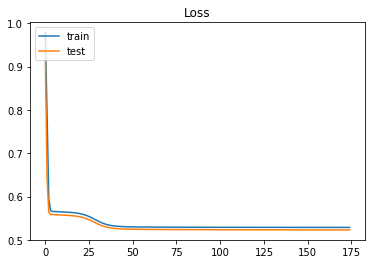

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
AE_W = AE.layers[1].get_weights()[0]
np.linalg.norm(AE_W, axis=0)

array([1.2530967, 1.2840885], dtype=float32)

In [28]:
AE_W /= np.linalg.norm(AE_W, axis=0)

In [36]:
ae_x, ae_y = np.dot(AE_W.T, x_test)

ValueError: shapes (1024,2) and (26148,1024) not aligned: 2 (dim 1) != 26148 (dim 0)

In [31]:
X_train_new = np.hstack((x_test[:, :1000], x_test[:, :1000]))
X_train_new

array([[-0.25407272, -0.22816175, -0.3861854 , ..., -0.20524237,
        -0.27494942, -0.18650754],
       [-0.31540705, -0.31263257, -0.44133598, ..., -0.19925209,
        -0.24083293, -0.19518129],
       [-0.38546408,  0.68767586, -0.48071255, ...,  0.13601355,
         0.17868063,  0.05723592],
       ...,
       [ 0.45269522,  0.31345392,  1.43664631, ...,  1.19848044,
         1.45635518,  0.89408844],
       [-0.29497758, -0.34580174, -0.4040626 , ..., -0.16007755,
        -0.14931484, -0.09746432],
       [-0.31200979, -0.33076505, -0.3825048 , ..., -0.27741101,
        -0.29217467, -0.27357446]])

In [37]:
AE.layers[1].get_weights()

[array([[ 0.02366648, -0.01034197],
        [ 0.04764552,  0.02749572],
        [ 0.08435544,  0.02646278],
        ...,
        [ 0.01854486, -0.03659267],
        [ 0.03075085, -0.03743325],
        [-0.01352394,  0.03566866]], dtype=float32),
 array([ 0.00023886, -0.00136205], dtype=float32)]